In [3]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target 

selector = SelectKBest(score_func=chi2, k=2)

X_new = selector.fit_transform(X, y)


selected_features_indices = selector.get_support(indices=True)


selected_feature_names = X.columns[selected_features_indices]
print("Selected Features:", selected_feature_names)



Selected Features: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
import pandas as pdA


wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)  
y = wine.target 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


importances = rf.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                         Feature  Importance
9                color_intensity    0.180198
6                     flavanoids    0.165947
0                        alcohol    0.142041
12                       proline    0.126080
11  od280/od315_of_diluted_wines    0.096032
10                           hue    0.085966
5                  total_phenols    0.059758
4                      magnesium    0.034673
3              alcalinity_of_ash    0.033211
8                proanthocyanins    0.029778
1                     malic_acid    0.028976
2                            ash    0.011859
7           nonflavanoid_phenols    0.005480


In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel="linear")
rfe = RFE(estimator=svm, n_features_to_select=10)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['mean radius', 'mean concavity', 'mean concave points', 'radius error',
       'texture error', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='object')


In [6]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)


lasso_coef = pd.Series(lasso.coef_, index=X.columns)
selected_features = lasso_coef[lasso_coef != 0].index
print("Selected Features with Lasso:", selected_features)


Selected Features with Lasso: Index(['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6'], dtype='object')


In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


iris = load_iris()
X = iris.data  
y = iris.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix

breast_cancer = load_breast_cancer()

X = breast_cancer.data  
y = breast_cancer.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9649122807017544
Confusion Matrix:
[[ 59   4]
 [  2 106]]


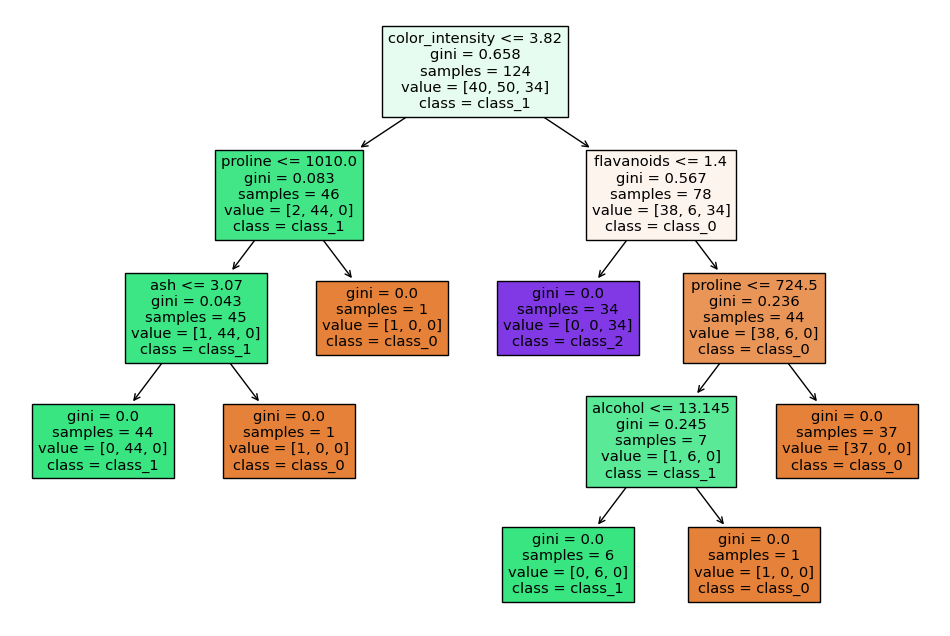

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

wine = load_wine()
X = wine.data  
y = wine.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()


In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



housing = fetch_california_housing()
X = housing.data  
y = housing.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.5305677824766754
R-squared Score: 0.5957702326061662


In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score


diabetes = load_diabetes()
X = diabetes.data 
y = diabetes.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)



y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 3112.9664151980814
R-squared Score: 0.4233440269603015


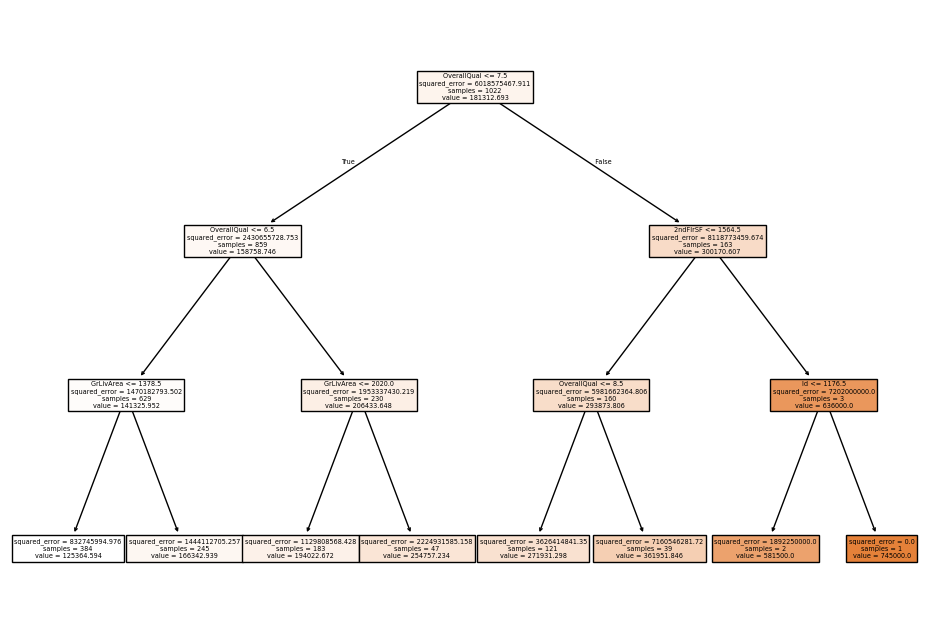

Mean Squared Error: 1780465683.4884696


In [16]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

housing = fetch_openml(data_id=42165, as_frame=True)

X = housing.data.select_dtypes(include=['float64', 'int64'])
y = housing.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_reg = DecisionTreeRegressor(random_state=42, max_depth=3)  
dt_reg.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(dt_reg, feature_names=X.columns, filled=True)
plt.show()

y_pred = dt_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
